In [71]:
import pandas as pd

air_quality_df: pd.DataFrame = pd.read_csv("AirQualityUCI.csv", sep=";")

air_quality_df = air_quality_df.rename(
    columns={
        "Date": "date",
        "Time": "time",
        "CO(GT)": "co",
        "PT08.S1(CO)": "pt08_s1_co",
        "NMHC(GT)": "nmhc",
        "C6H6(GT)": "c6h6",
        "PT08.S2(NMHC)": "pt08_s2_nmhc",
        "NOx(GT)": "nox",
        "PT08.S3(NOx)": "pt08_s3_nox",
        "NO2(GT)": "no2",
        "PT08.S4(NO2)": "pt08_s4_no2",
        "PT08.S5(O3)": "pt08_s5_o3",
        "T": "temperature",
        "RH": "humidity",
        "AH": "absolute_humidity",
    }
)

air_quality_df["date"] = pd.to_datetime(air_quality_df["date"], format="%d/%m/%Y")
air_quality_df["time"] = pd.to_datetime(air_quality_df["time"], format="%H.%M.%S").dt.strftime("%H:%M:%S")

air_quality_df["datetime"] = pd.to_datetime(air_quality_df["date"].astype(str) + " " + air_quality_df["time"])

air_quality_df = air_quality_df.drop(columns=["date", "time"])
air_quality_df = air_quality_df.set_index("datetime")

air_quality_df = air_quality_df.iloc[:, :-2]

air_quality_df = air_quality_df.dropna()

air_quality_df.to_csv("air_quality_processed.csv", index=True, sep=";")

In [72]:
air_quality_df.head()

,co,pt08_s1_co,nmhc,c6h6,pt08_s2_nmhc,nox,pt08_s3_nox,no2,pt08_s4_no2,pt08_s5_o3,temperature,humidity,absolute_humidity
datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [73]:
air_quality_considered = air_quality_df[["nox", "no2"]].copy()

air_quality_considered = air_quality_considered.replace(-200.0, pd.NA)
air_quality_considered = air_quality_considered.dropna()

air_quality_considered["is_air_good_nox"] = air_quality_considered["nox"] < 200
air_quality_considered["is_air_good_no2"] = air_quality_considered["no2"] < 40

air_quality_considered["is_air_good"] = (
    air_quality_considered["is_air_good_nox"] & air_quality_considered["is_air_good_no2"]
)

air_quality_considered

,nox,no2,is_air_good_nox,is_air_good_no2,is_air_good
datetime,,,,,
2004-03-10 18:00:00,166.0,113.0,True,False,False
2004-03-10 19:00:00,103.0,92.0,True,False,False
2004-03-10 20:00:00,131.0,114.0,True,False,False
2004-03-10 21:00:00,172.0,122.0,True,False,False
2004-03-10 22:00:00,131.0,116.0,True,False,False
...,...,...,...,...,...
2005-04-04 10:00:00,472.0,190.0,False,False,False
2005-04-04 11:00:00,353.0,179.0,False,False,False
2005-04-04 12:00:00,293.0,175.0,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = air_quality_considered[["nox", "no2"]]
y = air_quality_considered["is_air_good"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4753
)

# X_train = X_train.values.reshape(-1, 1)
# X_test = X_test.values.reshape(-1, 1)


In [77]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1492
        True       1.00      1.00      1.00        51

    accuracy                           1.00      1543
   macro avg       1.00      1.00      1.00      1543
weighted avg       1.00      1.00      1.00      1543



Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1492
        True       1.00      1.00      1.00        51

    accuracy                           1.00      1543
   macro avg       1.00      1.00      1.00      1543
weighted avg       1.00      1.00      1.00      1543



IndexError: list index out of range

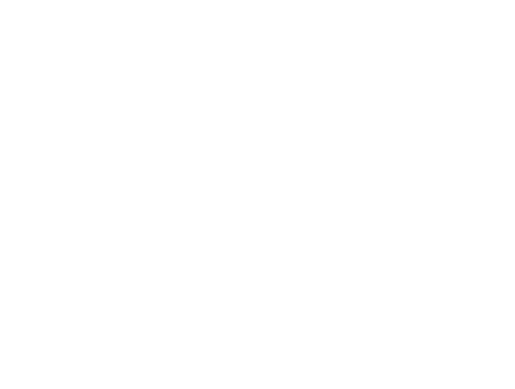

In [78]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_model.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

plot_tree(decision_tree_model, filled=True, feature_names=["nox"], class_names=["Bad", "Good"])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       680
        True       1.00      1.00      1.00       863

    accuracy                           1.00      1543
   macro avg       1.00      1.00      1.00      1543
weighted avg       1.00      1.00      1.00      1543

